# Economic Data Analysis with Fred & Pandas

This project, conducted in Jupyter Notebook and intended for my data analysis portfolio, involves pulling economic data from the Federal Reserve Economic Data (FRED) using the `fredapi` library. The analysis is performed using `pandas`, `numpy`, `matplotlib`, and `plotly`.

### Setup
To set up the project, install the required libraries by running the following command:

In [ ]:
!pip install -r requirements.txt

### Configuration and API Key Setup

This section initializes the configuration and API key setup for the project. It includes loading necessary libraries, configuring options, and retrieving the API key from the `config.ini` file using the `configparser` module. The `fredapi` library is then used to set up the Fred object with the obtained API key.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import time

# Set the style for plots
plt.style.use('fivethirtyeight')

# Set max_columns option for pandas display
with pd.option_context('display.max_columns', 500):
    color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [45]:
# Read API key from config.ini
import configparser
config = configparser.ConfigParser()
config.read('config.ini')

# Check if 'API_KEYS' section and 'fred_key' key exist in config.ini
if 'API_KEYS' in config and 'fred_key' in config['API_KEYS']:
    fred_key = config['API_KEYS']['fred_key']
else:
    print("Error: 'API_KEYS' section or 'fred_key' key not found in config.ini")

In [46]:
# Initialize Fred object with API key (if available)
from fredapi import Fred
fred = Fred(api_key=fred_key) if fred_key else Fred()

### Search for S&P Economic Data

This code queries the FRED database for economic data related to the S&P index, ordered by popularity.

In [47]:
# Search for economic data related to S&P with order by popularity
sp_search = fred.search('S&P', order_by='popularity')

# Display the first few rows of the search results
sp_search.head()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-22,2024-01-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-01-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-19 08:09:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-22,2024-01-22,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-01-22,2024-01-22,S&P 500,2014-01-21,2024-01-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-01-19 19:11:02-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-01-22,2024-01-22,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-22,2024-01-22,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-01-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-19 08:09:07-06:00,82,This data represents the effective yield of th...


### Plotting S&P 500 Data

To visualize the S&P 500 data, the code uses the `get_series` method from the `fred` library to fetch the series with the ID 'SP500'. The resulting time series is then plotted using `matplotlib.pyplot` with a specified figure size, title, and line width.

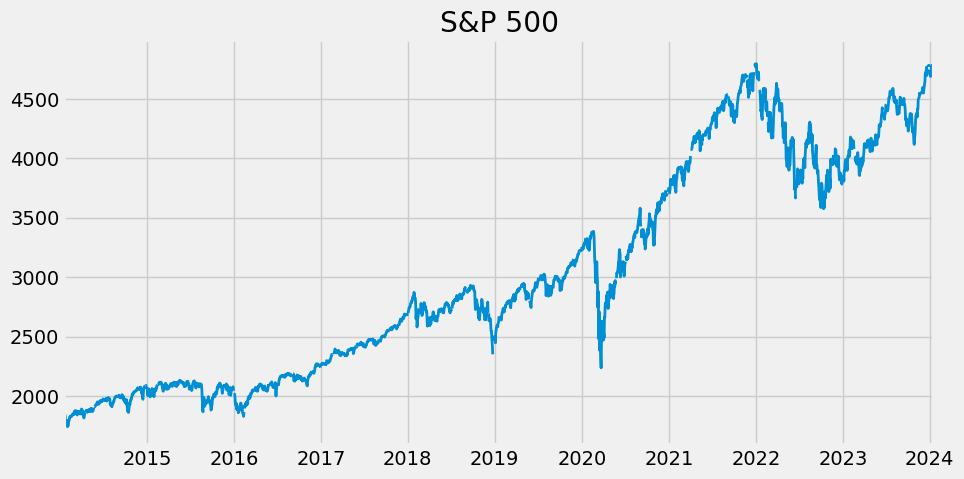

In [48]:
# Fetch S&P 500 data from FRED using the series ID 'SP500'
sp500 = fred.get_series(series_id='SP500')

# Plot the S&P 500 data with specified figure size, title, and line width
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# Display the plot
plt.show()

### Fetching and Processing Unemployment Rate Data for States

This section of the code involves searching for unemployment rate data for states, filtering and processing the data, and creating a DataFrame with relevant information.

In [49]:
# Search for unemployment rate data for states with monthly frequency
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

# Filter criteria: Include only Seasonally Adjusted rates in percent
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

# Select relevant data: Focus on entries containing "Unemployment Rate" in the title
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [50]:
# Initialize an empty list to store individual series
all_results = []

# Iterate through the index of the filtered unemployment rate DataFrame
for myid in unemp_df.index:
    # Get the time series data for each state
    results = fred.get_series(myid)
    
    # Convert the series to a DataFrame with the series ID as the column name
    results = results.to_frame(name=myid)
    
    # Append the DataFrame to the list
    all_results.append(results)
    
    # Pause to avoid making requests too quickly and getting blocked
    time.sleep(0.1)

# Concatenate all individual DataFrames into a single DataFrame
uemp_results = pd.concat(all_results, axis=1)


In [51]:
# Initialize a list to store columns to be dropped
cols_to_drop = []

# Iterate through columns of the unemployment results DataFrame
for i in uemp_results:
    # Check if the column name length is greater than 4
    if len(i) > 4:
        # Add column name to the list of columns to be dropped
        cols_to_drop.append(i)

# Drop specified columns from the unemployment results DataFrame
uemp_results = uemp_results.drop(columns=cols_to_drop, axis=1)

In [52]:
# Create a copy of the unemployment results DataFrame
uemp_states = uemp_results.copy()

# Drop rows with missing values
uemp_states = uemp_states.dropna()

# Create a dictionary mapping column names to state names
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()

# Rename columns in the state-wise unemployment DataFrame using the dictionary
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [69]:
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import Legend
from bokeh.io import output_notebook

# Enable Bokeh to display plots inline in the notebook
output_notebook()

# Create a Bokeh figure
p = figure(title='Unemployment Rate by State Over Time', x_axis_label='Year', y_axis_label='Unemployment Rate', width=800, height=500)

# Plot each state as a separate line
for i, state in enumerate(uemp_states.columns):
    p.line(uemp_states.index, uemp_states[state], line_width=2, legend_label=state, color=Category10[10][i % 10])

# Customize the plot
p.legend.click_policy = 'hide'  # Clicking on legend items hides/shows corresponding lines
p.legend.label_text_font_size = '8pt'  # Adjust legend font size for better visibility

# Show the plot inline in the notebook
show(p, notebook_handle=True)


Loading BokehJS ...

### Bar Chart: Unemployment Rate by State (May 2023)

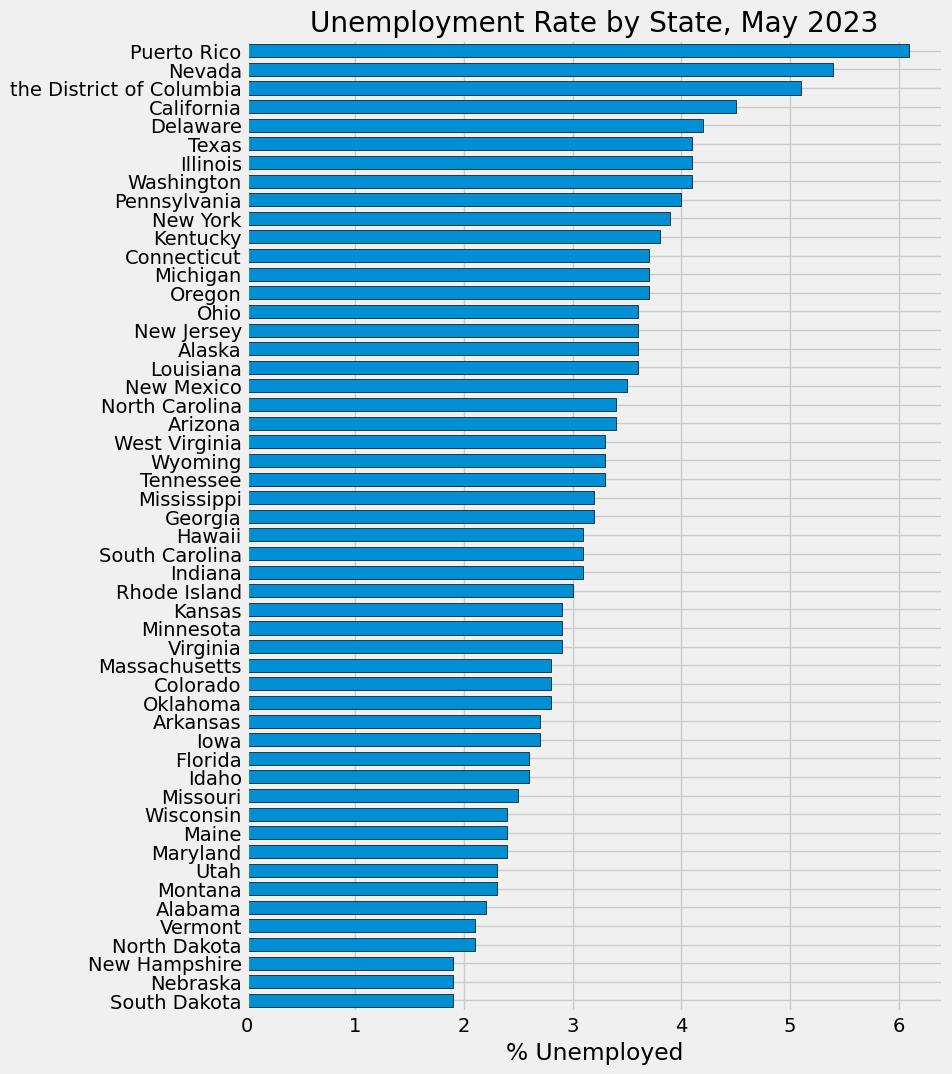

In [54]:
# Create a horizontal bar chart for Unemployment Rate by State in May 2023
ax = uemp_states.loc[uemp_states.index == '2023-05-01'].T \
    .sort_values('2023-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2023')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

## Labor Force Participation Rate by State

### Search for Participation Rate Data

In [55]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [56]:
# Initialize an empty list to store results
all_results = []

# Iterate over the index of the DataFrame containing participation rate search results
for myid in part_df.index:
    # Retrieve time series data for the specified series ID
    results = fred.get_series(myid)
    
    # Convert the data to a DataFrame with a specified column name
    results = results.to_frame(name=myid)
    
    # Append the DataFrame to the list
    all_results.append(results)
    
    # Pause to avoid making requests too quickly and getting blocked
    time.sleep(0.1)

# Concatenate all DataFrames in the list along the columns axis
part_states = pd.concat(all_results, axis=1)

# Rename columns using the dictionary created earlier
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


In [57]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

## Plot Unemployment vs Participation for Multiple States Over Time

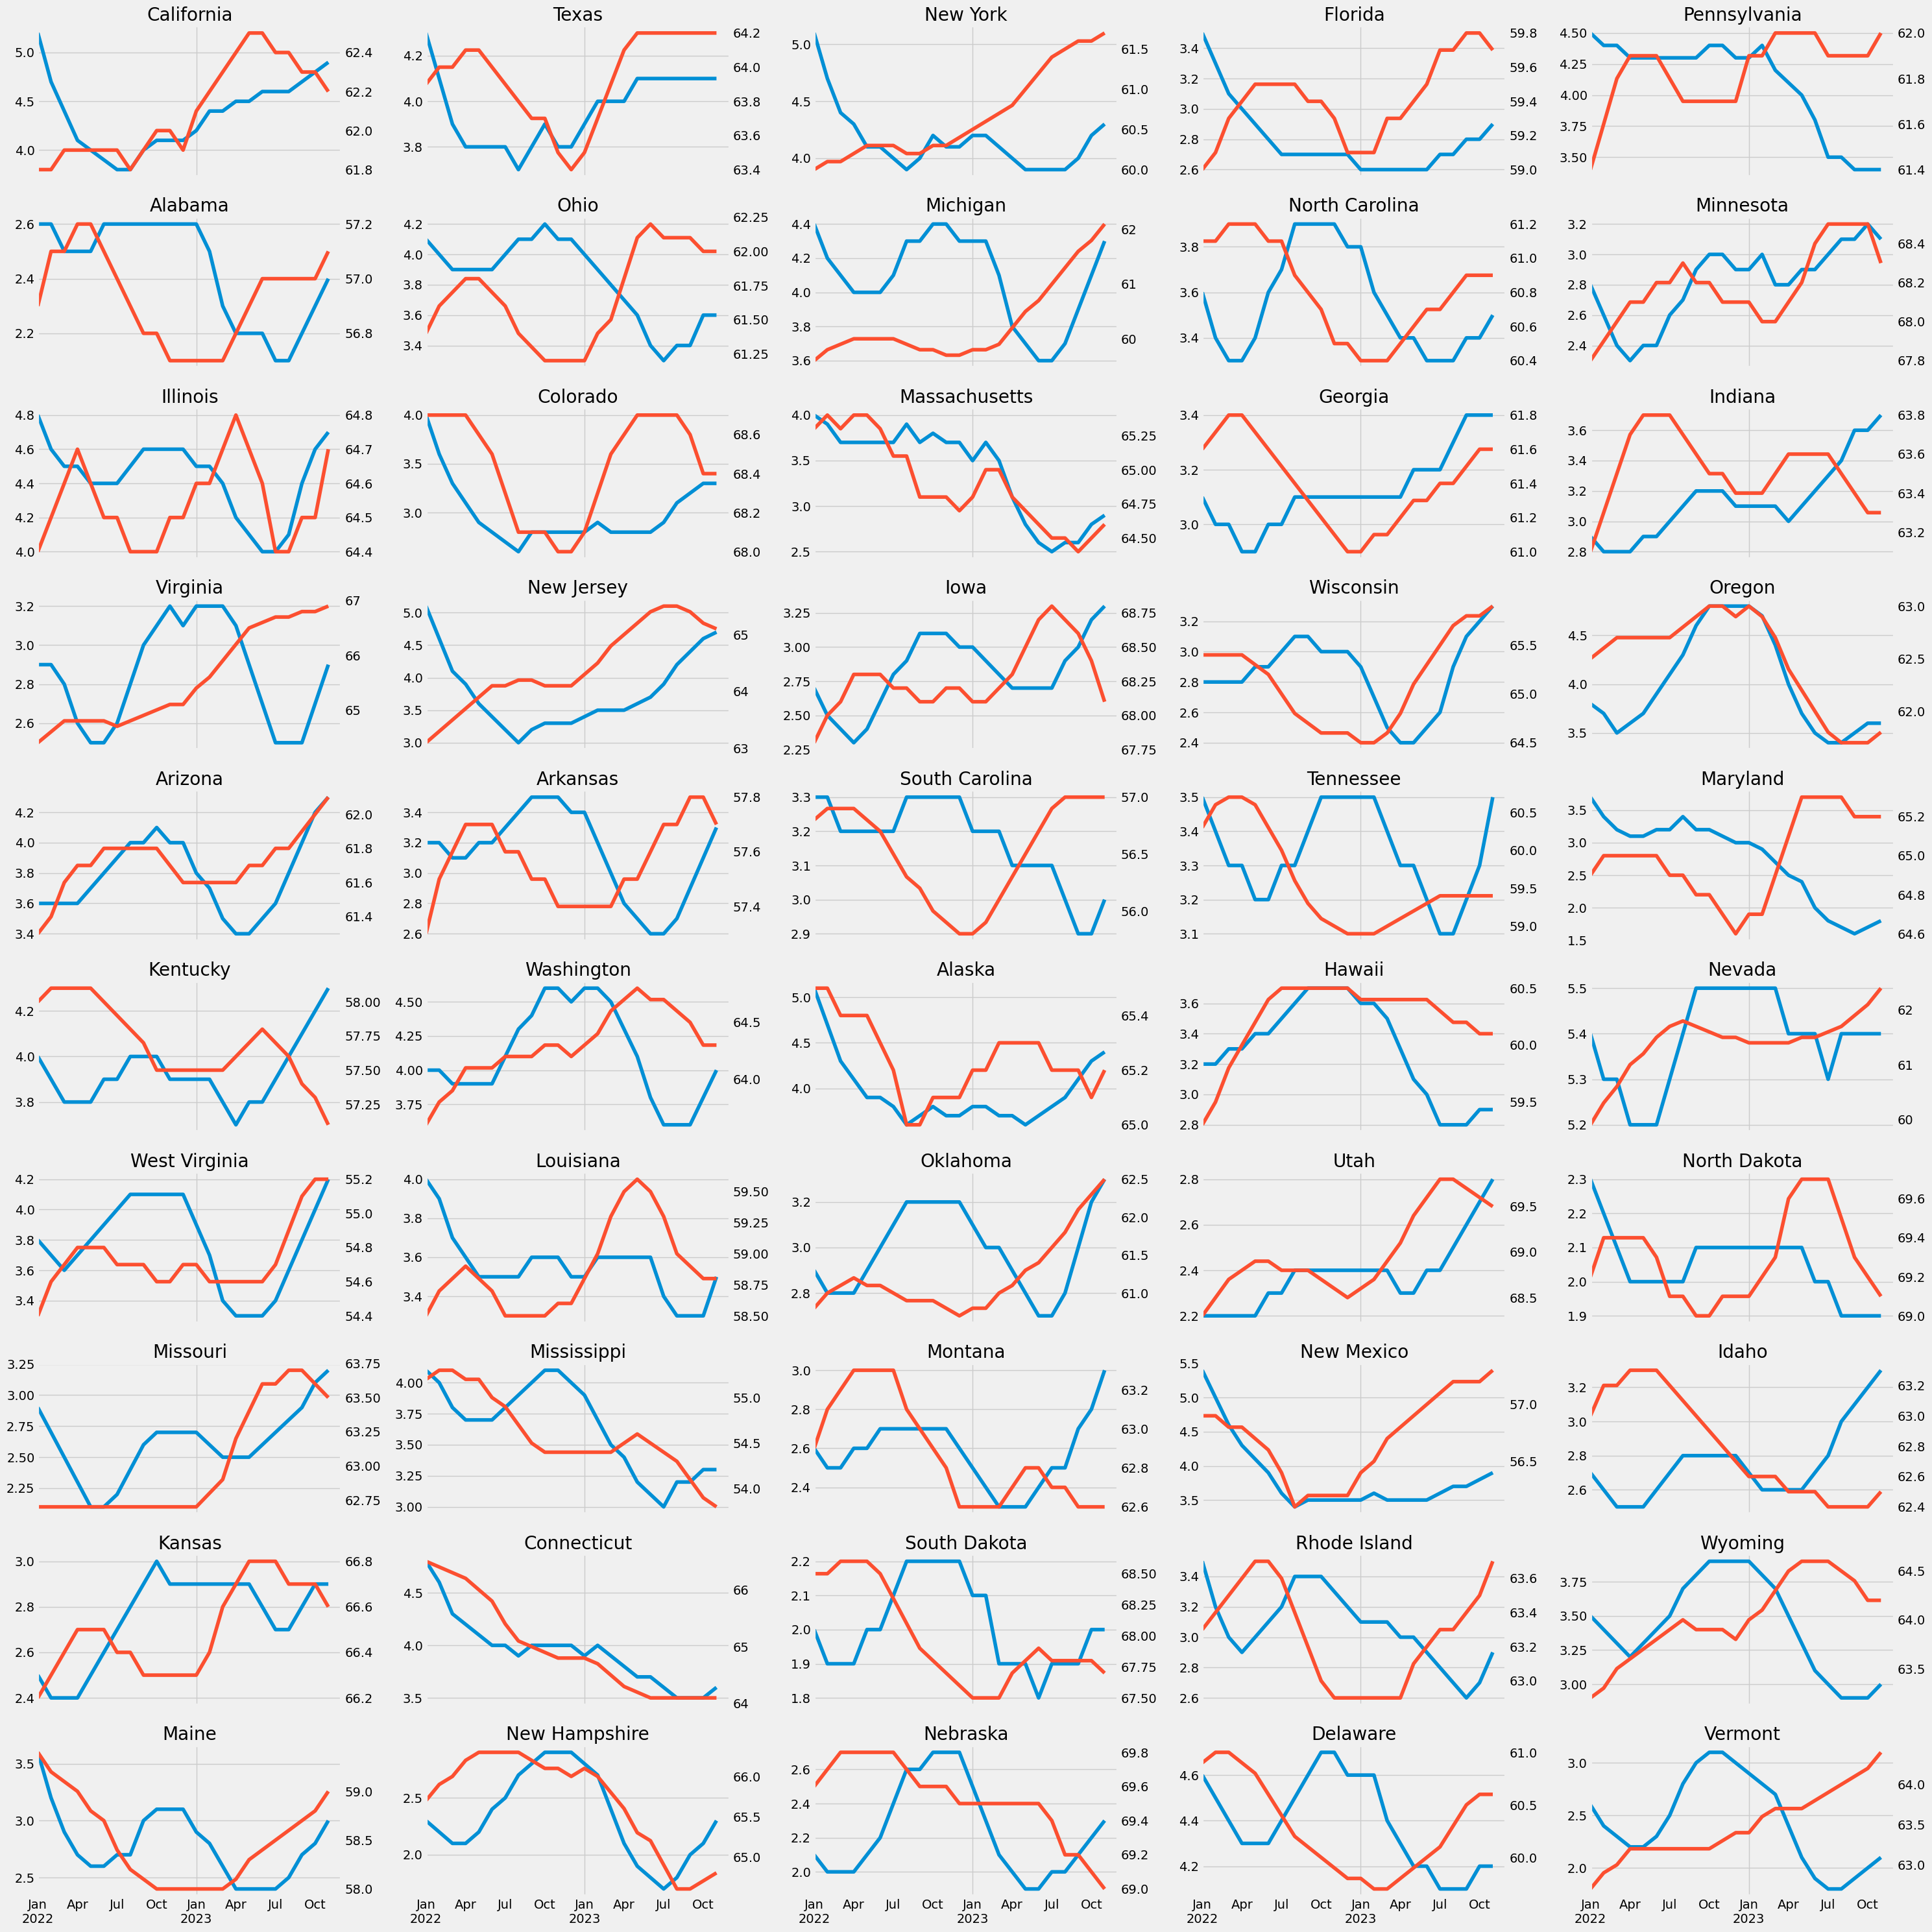

In [58]:
# Create subplots with 10 rows and 5 columns
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

# Initialize index variable
i = 0

# Iterate over each state in the DataFrame columns
for state in uemp_states.columns:
    # Skip specific states
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    
    # Create a twin Axes for the second y-axis
    ax2 = axs[i].twinx()
    
    # Plot Unemployment data for the specified time range
    uemp_states.query('index >= 2022 and index < 2024')[state] \
        .plot(ax=axs[i], label='Unemployment')
    
    # Plot Participation data for the specified time range on the second y-axis
    part_states.query('index >= 2022 and index < 2024')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    
    # Turn off grid for the second y-axis
    ax2.grid(False)
    
    # Set the title for the subplot
    axs[i].set_title(state)
    
    # Increment the index variable
    i += 1

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

## Plot Unemployment and Participation Rates for a Specific State (e.g., Massachusetts)

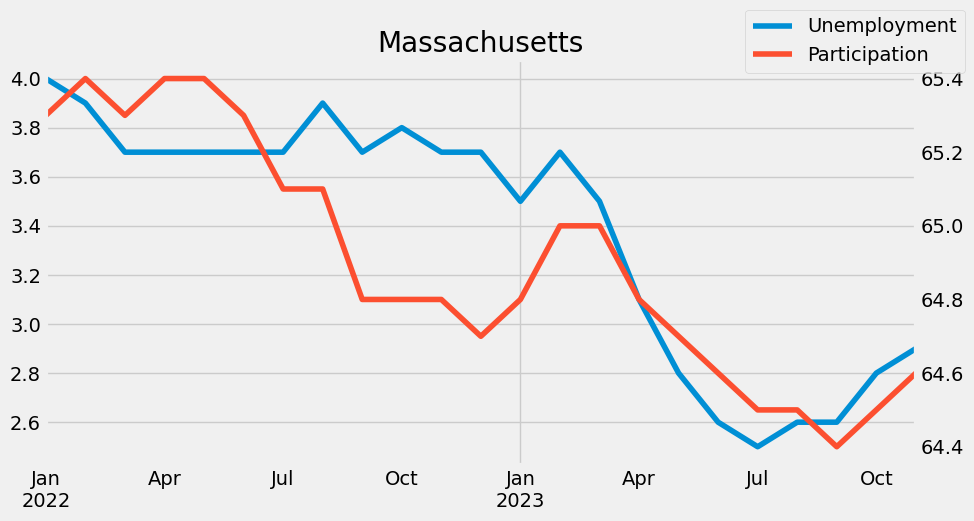

In [59]:
# Specify the target state
state = 'Massachusetts'

# Create a new subplot with a specified size
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)

# Create a twin Axes sharing the xaxis
ax2 = ax.twinx()

# Resample the DataFrame to monthly frequency
uemp_states2 = uemp_states.asfreq('MS')

# Plot the unemployment rate for the specified state
l1 = uemp_states2.query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax, label='Unemployment')

# Plot the participation rate for the specified state on the secondary y-axis
l2 = part_states.dropna().query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])

# Turn off the grid on the secondary y-axis
ax2.grid(False)

# Set the title of the plot
ax.set_title(state)

# Add a legend with specified labels
fig.legend(labels=['Unemployment','Participation'])

# Display the plot
plt.show()